In [23]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
dd_data=pd.read_csv(mouse_drug_data_to_load)
ct_data=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
all_data=dd_data.merge(ct_data, on="Mouse ID")
all_data["tv_int"]=all_data["Tumor Volume (mm3)"].astype(int)
used_data=all_data.set_index("Drug").loc[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]
# Display the data table for preview
used_data.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,tv_int
Drug,,,,,
Capomulin,b128,0,45.000000,0,45
Capomulin,b128,5,45.651331,0,45
Capomulin,b128,10,43.270852,0,43
Capomulin,b128,15,43.784893,0,43
Capomulin,b128,20,42.731552,0,42
Capomulin,b128,25,43.262145,1,43
Capomulin,b128,30,40.605335,1,40
Capomulin,b128,35,37.967644,1,37
Capomulin,b128,40,38.379726,2,38


## Tumor Response to Treatment

In [24]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtv_grp=used_data.groupby(["Drug", "Timepoint"])["tv_int"].mean()
# Convert to DataFrame
mean_grp_drg_tp=pd.DataFrame(mtv_grp).rename(columns={"tv_int":"Mean"})
# Preview DataFrame
mean_grp_drg_tp

Mean
Drug      Timepoint           
Capomulin 0          45.000000
          5          43.680000
          10         42.560000
          15         41.583333
          20         40.217391
          25         39.454545
          30         38.181818
          35         37.272727
          40         36.476190
          45         35.761905
Infubinol 0          45.000000
          5          46.600000
          10         48.904762
          15         50.761905
          20         52.750000
          25         55.222222
          30         57.823529
          35         60.166667
          40         62.800000
          45         65.222222
Ketapril  0          45.000000
          5          46.869565
          10         49.045455
          15         51.894737
          20         54.263158
          25         57.210526
          30         60.555556
          35         63.000000
          40         65.666667
          45         70.090909
Placebo   0          45.000000
          5          46.500000
          10         49.000000
          15         50.850000
          20         53.842105
          25         57.000000
          30         59.400000
          35         61.928571
          40         64.583333
          45         67.636364

In [29]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
setv_grp=used_data.groupby(["Drug", "Timepoint"])["tv_int"].sem()

# Convert to DataFrame
sem_grp_drg_tp=pd.DataFrame(setv_grp).rename(columns={"tv_int":"SEM"})
# Preview DataFrame
sem_grp_drg_tp.head(10)


SEM
Drug      Timepoint          
Capomulin 0          0.000000
          5          0.423163
          10         0.716659
          15         0.855326
          20         0.908799
          25         0.906273
          30         0.963930
          35         1.034433
          40         1.225948
          45         1.206934

In [30]:
# Minor Data Munging to Re-Format the Data Frames
mean_trp= mean_grp_drg_tp.reset_index().pivot(index='Timepoint', columns='Drug', values='Mean')
# Preview that Reformatting worked
df_mean=pd.DataFrame(mean_trp).reset_index()
print (df_mean)

# Minor Data Munging to Re-Format the Data Frames
sem_trp= sem_grp_drg_tp.reset_index().pivot(index='Timepoint', columns='Drug', values='SEM')
# Preview that Reformatting worked
df_sem=pd.DataFrame(sem_trp).reset_index()
print(df_sem)

Drug  Timepoint  Capomulin  Infubinol   Ketapril    Placebo
0             0  45.000000  45.000000  45.000000  45.000000
1             5  43.680000  46.600000  46.869565  46.500000
2            10  42.560000  48.904762  49.045455  49.000000
3            15  41.583333  50.761905  51.894737  50.850000
4            20  40.217391  52.750000  54.263158  53.842105
5            25  39.454545  55.222222  57.210526  57.000000
6            30  38.181818  57.823529  60.555556  59.400000
7            35  37.272727  60.166667  63.000000  61.928571
8            40  36.476190  62.800000  65.666667  64.583333
9            45  35.761905  65.222222  70.090909  67.636364
Drug  Timepoint  Capomulin  Infubinol  Ketapril   Placebo
0             0   0.000000   0.000000  0.000000  0.000000
1             5   0.423163   0.251661  0.283292  0.217029
2            10   0.716659   0.283723  0.369141  0.399275
3            15   0.855326   0.371001  0.601629  0.603826
4            20   0.908799   0.475035  0.720794  0

Text(0,0.5,'Tumor Volume (mm3)')

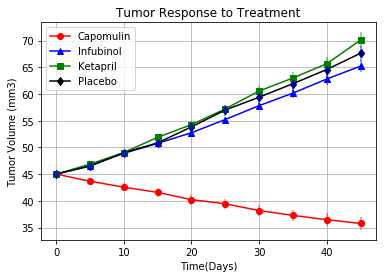

In [31]:
# Generate the Plot (with Error Bars)
#Draw error bars
fig, ax = plt.subplots()

cap, = plt.plot(df_mean["Timepoint"], df_mean["Capomulin"], color="red", label="Capomulin", marker='o')
inf, = plt.plot(df_mean["Timepoint"], df_mean["Infubinol"], color="blue", label="Infubinol", marker='^')
ket, = plt.plot(df_mean["Timepoint"], df_mean["Ketapril"], color="green", label="Ketapril", marker='s')
plc, = plt.plot(df_mean["Timepoint"], df_mean["Placebo"], color="black", label="Placebo", marker='d')
# Adds a legend and sets its location to the lower right
plt.legend(loc="upper left")

#Draw error_
ax.errorbar(df_mean["Timepoint"], df_mean["Capomulin"], yerr=df_sem["Capomulin"], fmt="o", color="r",alpha=0.5)
ax.errorbar(df_mean["Timepoint"], df_mean["Infubinol"], yerr=df_sem["Infubinol"], fmt="^", color="b",alpha=0.5)
ax.errorbar(df_mean["Timepoint"], df_mean["Ketapril"], yerr=df_sem["Ketapril"], fmt="s", color="g",alpha=0.5)
ax.errorbar(df_mean["Timepoint"], df_mean["Placebo"], yerr=df_sem["Placebo"], fmt="d", color="b",alpha=0.5)

#Add gridlines
plt.grid()
# Add labels to X and Y axes and add title
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure



In [28]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [5]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mmr_grp=used_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
mean_grp_mmr=pd.DataFrame(mmr_grp).rename(columns={"Metastatic Sites":"Mean"})
# Preview DataFrame
mean_grp_mmr.head(5)



Mean
Drug      Timepoint          
Capomulin 0          0.000000
          5          0.160000
          10         0.320000
          15         0.375000
          20         0.652174

In [6]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
semr_grp=used_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
sem_grp_mmr=pd.DataFrame(semr_grp).rename(columns={"Metastatic Sites":"SEM"})
# Preview DataFrame
sem_grp_mmr.head(5)


SEM
Drug      Timepoint          
Capomulin 0          0.000000
          5          0.074833
          10         0.125433
          15         0.132048
          20         0.161621

In [33]:
# Minor Data Munging to Re-Format the Data Frames
mean_trp_mmr= mean_grp_mmr.reset_index().pivot(index='Timepoint', columns='Drug', values='Mean')
# Preview that Reformatting worked
df_mean_mmr=pd.DataFrame(mean_trp_mmr).reset_index()
print (df_mean_mmr)

# Minor Data Munging to Re-Format the Data Frames
sem_trp_mmr= sem_grp_mmr.reset_index().pivot(index='Timepoint', columns='Drug', values='SEM')
# Preview that Reformatting worked
df_sem_mmr=pd.DataFrame(sem_trp_mmr).reset_index()
print(df_sem_mmr)


Drug  Timepoint  Capomulin  Infubinol  Ketapril   Placebo
0             0   0.000000   0.000000  0.000000  0.000000
1             5   0.160000   0.280000  0.304348  0.375000
2            10   0.320000   0.666667  0.590909  0.833333
3            15   0.375000   0.904762  0.842105  1.250000
4            20   0.652174   1.050000  1.210526  1.526316
5            25   0.818182   1.277778  1.631579  1.941176
6            30   1.090909   1.588235  2.055556  2.266667
7            35   1.181818   1.666667  2.294118  2.642857
8            40   1.380952   2.100000  2.733333  3.166667
9            45   1.476190   2.111111  3.363636  3.272727
Drug  Timepoint  Capomulin  Infubinol  Ketapril   Placebo
0             0   0.000000   0.000000  0.000000  0.000000
1             5   0.074833   0.091652  0.098100  0.100947
2            10   0.125433   0.159364  0.142018  0.115261
3            15   0.132048   0.194015  0.191381  0.190221
4            20   0.161621   0.234801  0.236680  0.234064
5            2

Text(0,0.5,'Met. Sites')

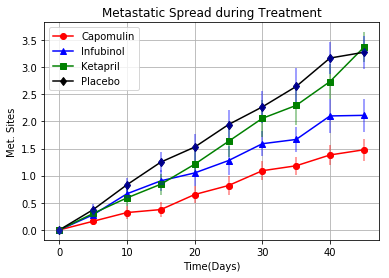

In [34]:
# Generate the Plot (with Error Bars)
#Draw error bars
fig, ax = plt.subplots()

cap, = plt.plot(df_mean_mmr["Timepoint"], df_mean_mmr["Capomulin"], color="red", label="Capomulin", marker='o')
inf, = plt.plot(df_mean_mmr["Timepoint"], df_mean_mmr["Infubinol"], color="blue", label="Infubinol", marker='^')
ket, = plt.plot(df_mean_mmr["Timepoint"], df_mean_mmr["Ketapril"], color="green", label="Ketapril", marker='s')
plc, = plt.plot(df_mean_mmr["Timepoint"], df_mean_mmr["Placebo"], color="black", label="Placebo", marker='d')
# Adds a legend and sets its location to the lower right
plt.legend(loc="upper left")

#Draw error_
ax.errorbar(df_mean_mmr["Timepoint"], df_mean_mmr["Capomulin"], yerr=df_sem_mmr["Capomulin"], fmt="o", color="r",alpha=0.5)
ax.errorbar(df_mean_mmr["Timepoint"], df_mean_mmr["Infubinol"], yerr=df_sem_mmr["Infubinol"], fmt="^", color="b",alpha=0.5)
ax.errorbar(df_mean_mmr["Timepoint"], df_mean_mmr["Ketapril"], yerr=df_sem_mmr["Ketapril"], fmt="s", color="g",alpha=0.5)
ax.errorbar(df_mean_mmr["Timepoint"], df_mean_mmr["Placebo"], yerr=df_sem_mmr["Placebo"], fmt="d", color="b",alpha=0.5)

#Add gridlines
plt.grid()
# Add labels to X and Y axes and add title
plt.title("Metastatic Spread during Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Met. Sites")

# Save the Figure


## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mct_grp_=used_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mct_grp=pd.DataFrame(mct_grp_).rename(columns={"Mouse ID":"Count"})
# Preview DataFrame
mct_grp.head(5)


Count
Drug      Timepoint       
Capomulin 0             25
          5             25
          10            25
          15            24
          20            23

In [42]:
# Minor Data Munging to Re-Format the Data Frames
mct_trp= mct_grp.reset_index().pivot(index='Timepoint', columns='Drug', values='Count')
# Preview that Reformatting worked
df_mct=pd.DataFrame(mct_trp).reset_index()
df_mct


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,21,22,24
3,15,24,21,19,20
4,20,23,20,19,19
5,25,22,18,19,17
6,30,22,17,18,15
7,35,22,12,17,14
8,40,21,10,15,12
9,45,21,9,11,11


Text(0,0.5,'Number of mice alive')

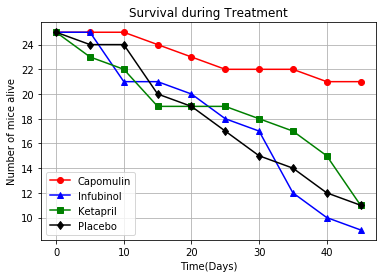

In [44]:
# Generate the Plot (with Error Bars)

cap, = plt.plot(df_mct["Timepoint"], df_mct["Capomulin"], color="red", label="Capomulin", marker='o')
inf, = plt.plot(df_mct["Timepoint"], df_mct["Infubinol"], color="blue", label="Infubinol", marker='^')
ket, = plt.plot(df_mct["Timepoint"], df_mct["Ketapril"], color="green", label="Ketapril", marker='s')
plc, = plt.plot(df_mct["Timepoint"], df_mct["Placebo"], color="black", label="Placebo", marker='d')
# Adds a legend and sets its location to the lower right
plt.legend(loc="lower left")

#Add gridlines
plt.grid()
# Add labels to X and Y axes and add title
plt.title("Survival during Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Number of mice alive")

# Save the Figure


## Summary Bar Graph

In [57]:
# Calculate the percent changes for each drug
mean_tv=mean_grp_drg_tp.reset_index()
val0_tup=mean_tv.loc[mean_grp_drg_tp["Timepoint"]==0,["Mean"]]
# Display the data to confirm
val0_tup


KeyError: 'Timepoint'

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

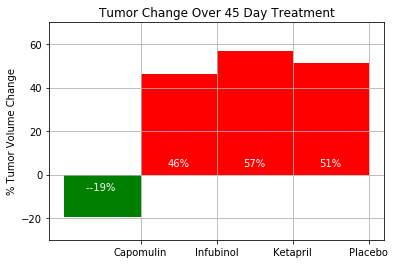